<a href="https://colab.research.google.com/github/ghadfield32/YOLO_exploration/blob/main/bball_customdata_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb

https://www.youtube.com/watch?v=LNwODJXcvt4&list=PLT4ZwFPi5zxFftzI735YoLmq3bFiP2DBo&index=40


Todos:
* Change the next roboflow dataset to have warriors-home, cavs-away, ball to basketball, rim to hoop, and leave referee


In [5]:
!pip install ultralytics

In [6]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode-checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 382, in entrypoint
    check_dict_alignment(full_args_dict, {a: ''})
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 203, in check_dict_alignment
    raise SyntaxError(string + CLI_HELP_MSG) from e
SyntaxError: 'mode-checks' is not a valid YOLO argument. Similar arguments are i.e. ['checks=<function check_yolo at 0x7c22cb72a0e0>'].

    Arguments received: ['yolo', 'mode-checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.


In [24]:
!pip install roboflow

#from roboflow import Roboflow
#rf = Roboflow(api_key="htpcxp3XQh7SsgMfjJns")
#project = rf.workspace("amrita-hlhw6").project("basketball-and-hoop-detection")
#dataset = project.version(1).download("yolov8")

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="htpcxp3XQh7SsgMfjJns")
project = rf.workspace("basketball-formations").project("warriors-vs-cavs-2016")
dataset = project.version(5).download("yolov8")
#v5 is only basketball, hoop, referee, and people. warriors/cavs need a lot more images annotated


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.180, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Warriors-vs-Cavs-2016-5 in yolov8:: 100%|██████████| 2904/2904 [00:00<00:00, 5768.70it/s]


In [25]:
#use to update yaml file train and val to just train/images because the extra hoop-detection is throwing it off

import yaml

def update_yaml_file(path):
    # Load the yaml file
    with open(path, 'r') as file:
        data_yaml = yaml.safe_load(file)

    # Modify the train and validation paths
    data_yaml['train'] = 'train/images'
    data_yaml['val'] = 'valid/images'

    # Save the modified yaml file back
    with open(path, 'w') as file:
        yaml.dump(data_yaml, file)

# Assuming your data.yaml path is /content/Basketball-and-Hoop-Detection-1/data.yaml
#update_yaml_file('/content/Basketball-and-Hoop-Detection-1/data.yaml')
update_yaml_file('/content/Warriors-vs-Cavs-2016-5/data.yaml')



In [26]:
#Train Model: select type of model (pose, classification, segmentation, detection), mode=train for custom datasets,
#             location of data.yaml, epoch size, and image size

!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

Ultralytics YOLOv8.0.180 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Warriors-vs-Cavs-2016-5/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, ke

Look for the different training metrics after:
* confusion matrix
* results
* prediction images





In [28]:
!ls /content/runs/detect/train/

args.yaml					    train_batch0.jpg
confusion_matrix_normalized.png			    train_batch1.jpg
confusion_matrix.png				    train_batch2.jpg
events.out.tfevents.1694823735.6088aee51254.5806.0  train_batch880.jpg
F1_curve.png					    train_batch881.jpg
labels_correlogram.jpg				    train_batch882.jpg
labels.jpg					    val_batch0_labels.jpg
P_curve.png					    val_batch0_pred.jpg
PR_curve.png					    val_batch1_labels.jpg
R_curve.png					    val_batch1_pred.jpg
results.csv					    weights
results.png


/content/runs/detect/train


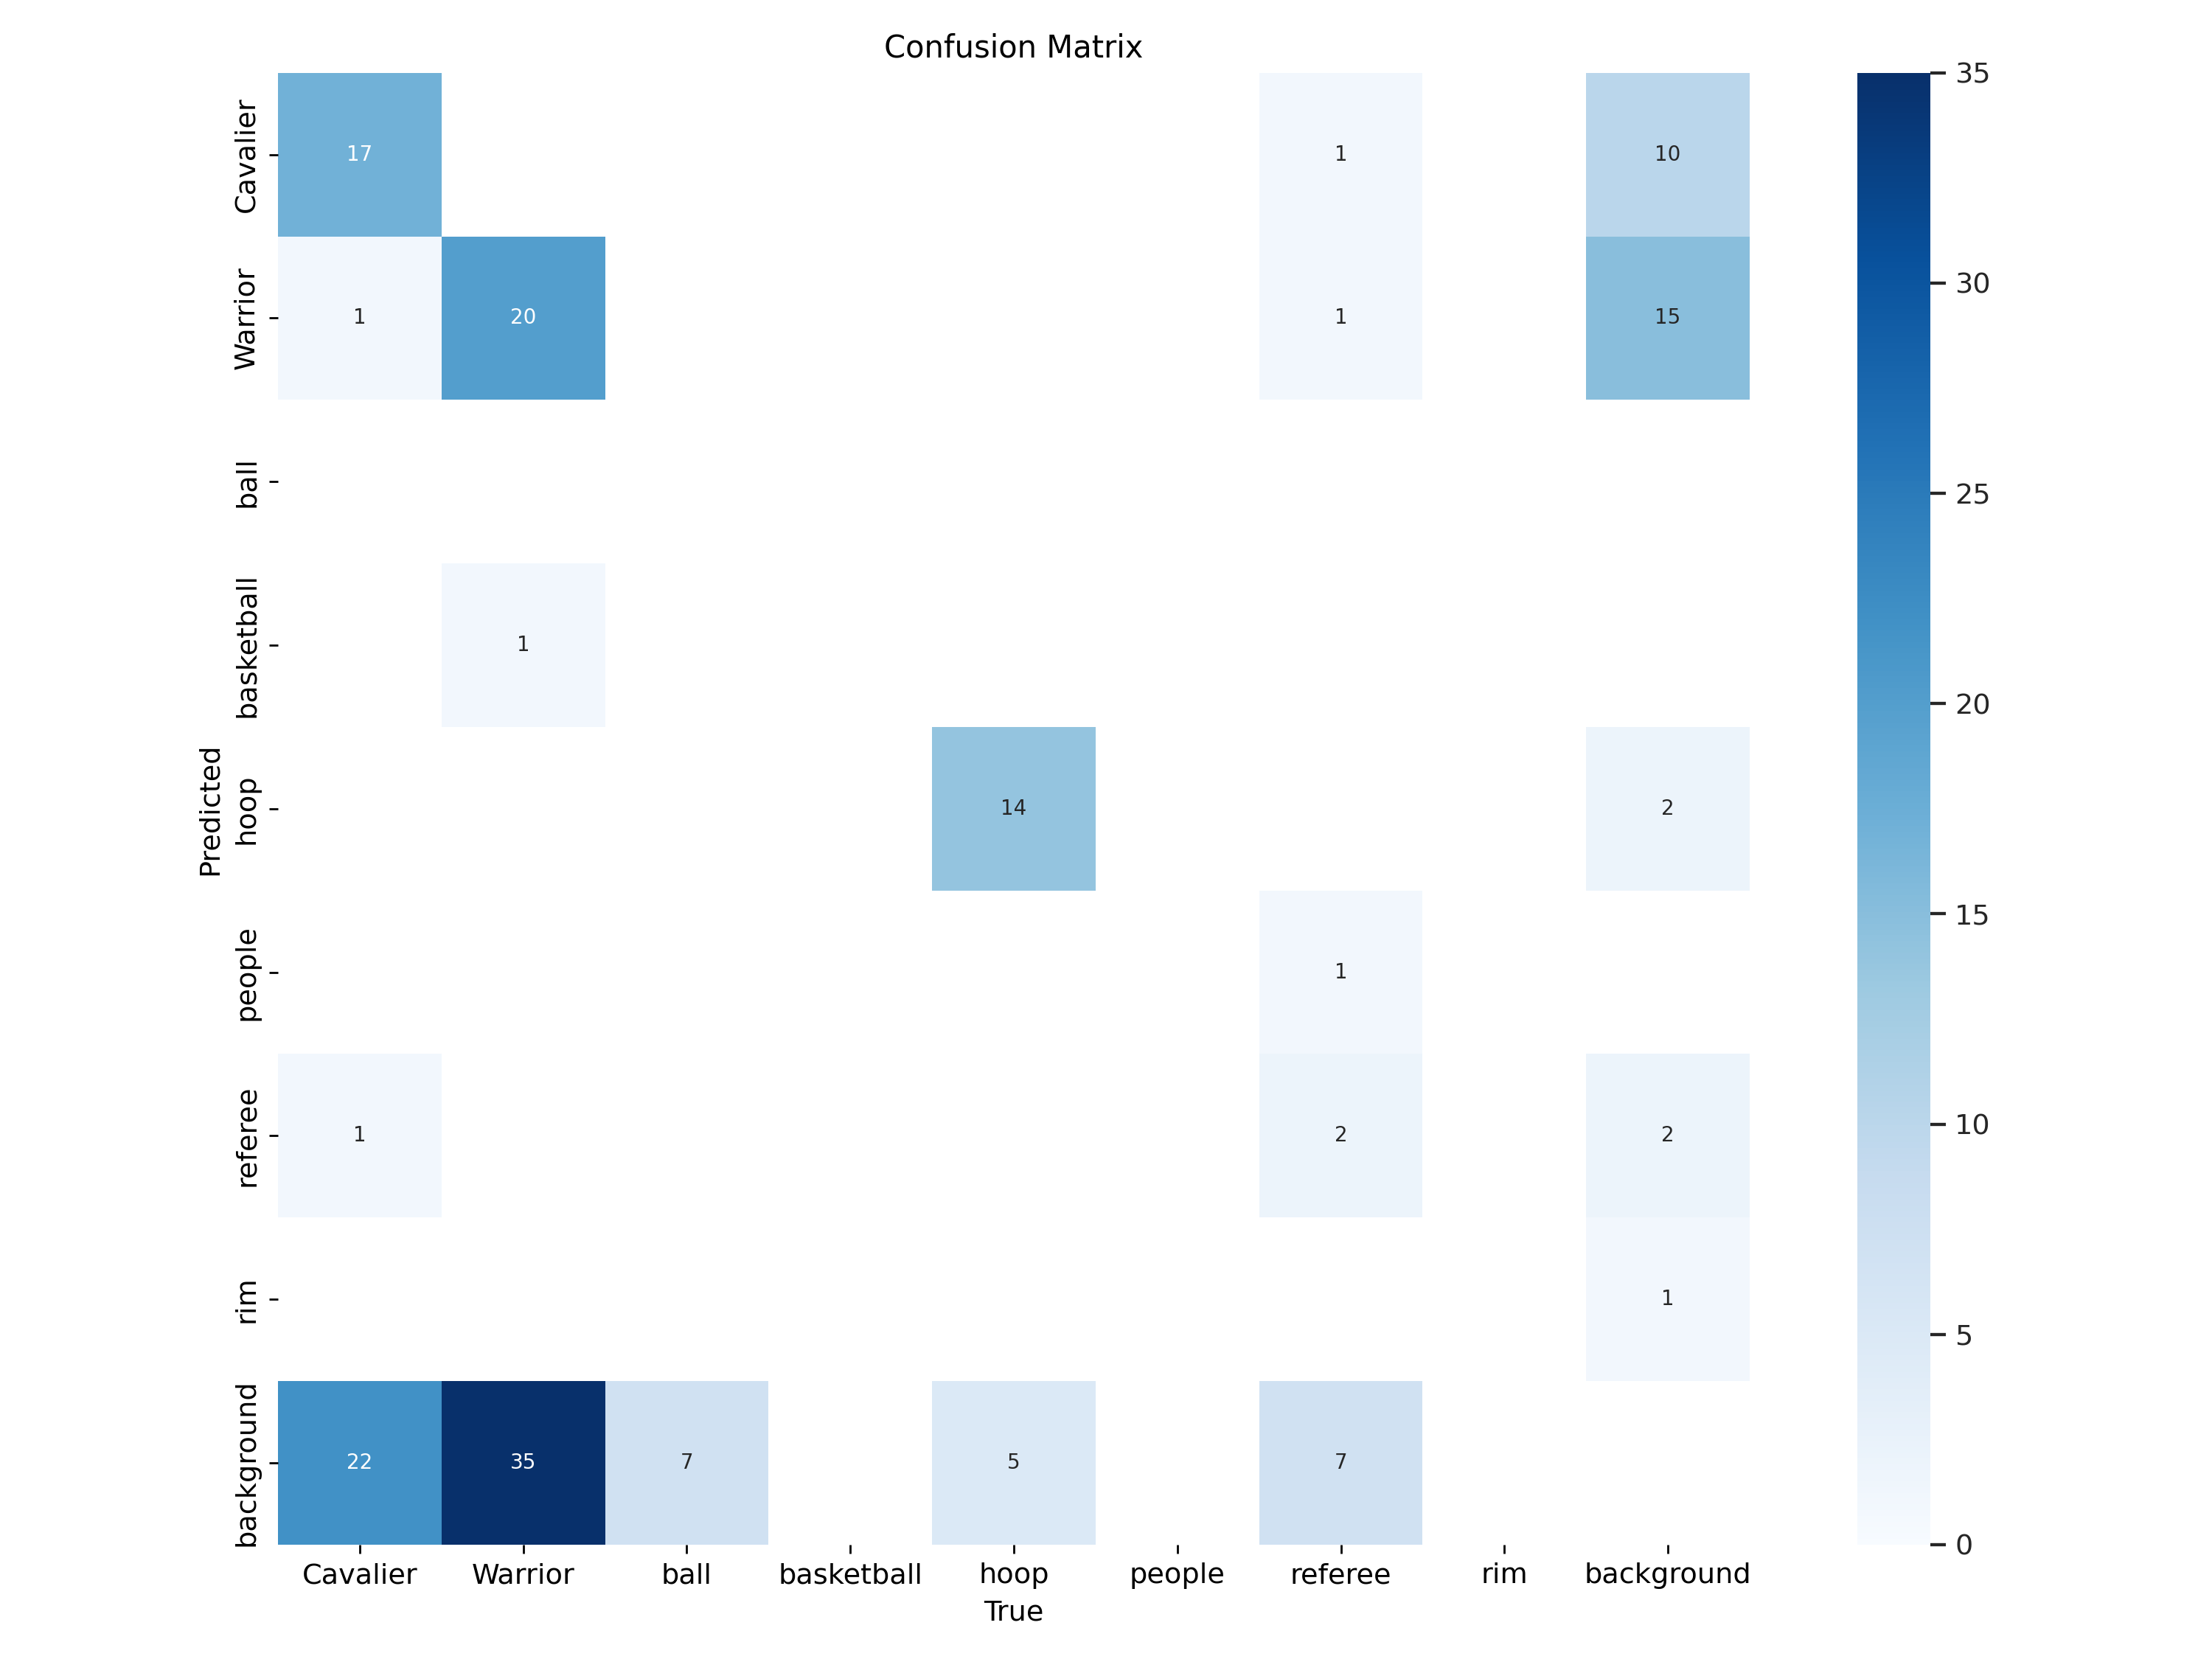

In [12]:
%cd /content/runs/detect/train/
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

/content


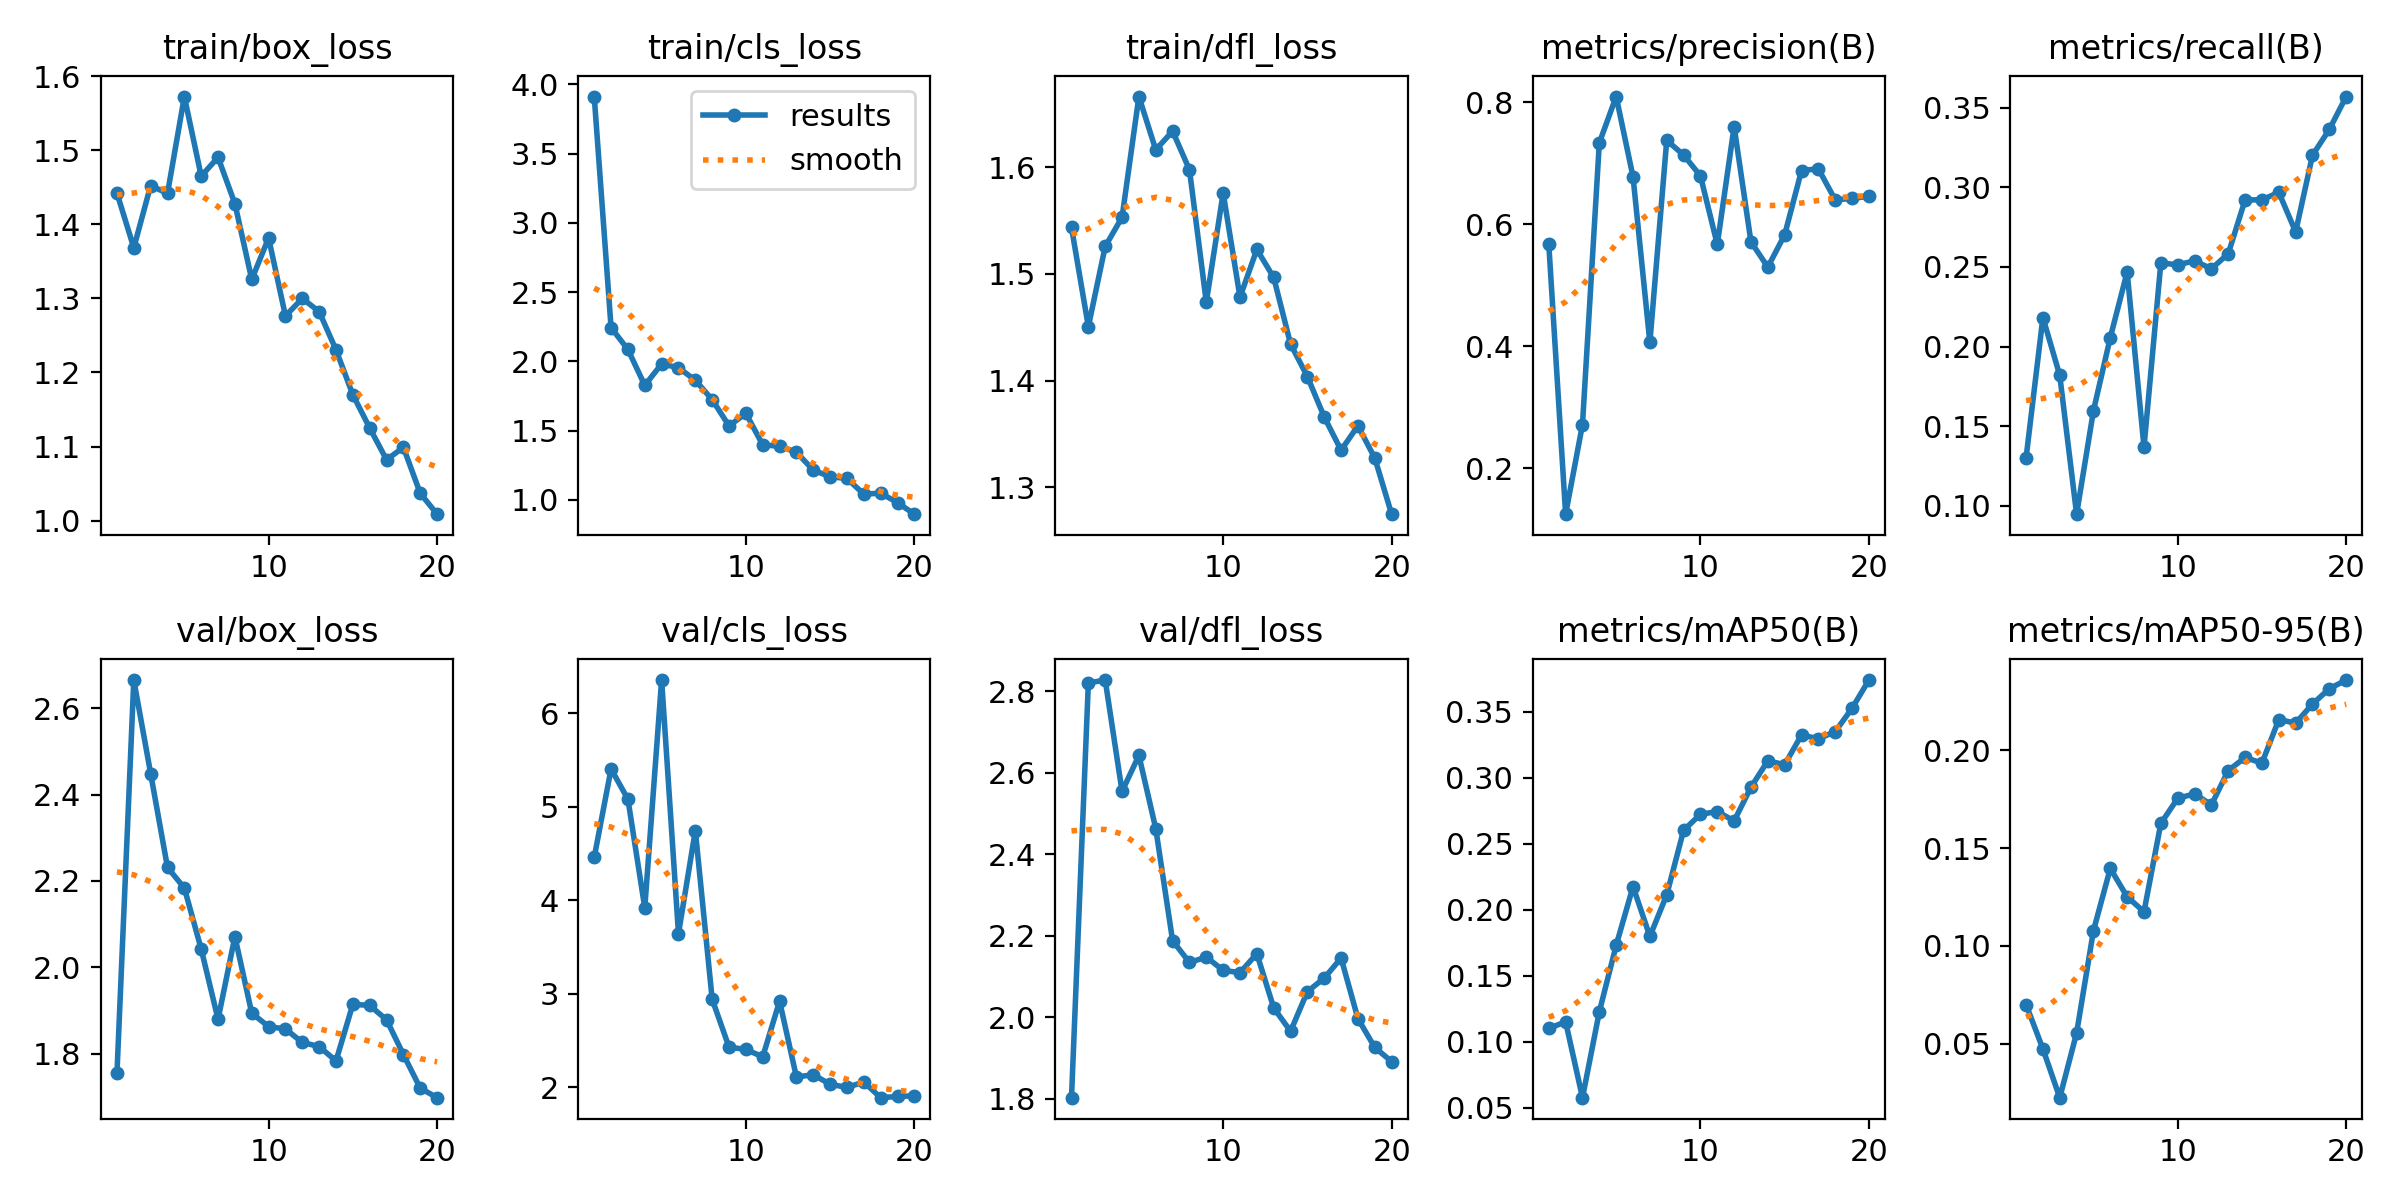

In [13]:
%cd /content
Image(filename=f'/content/runs/detect/train/results.png', width=600)

/content


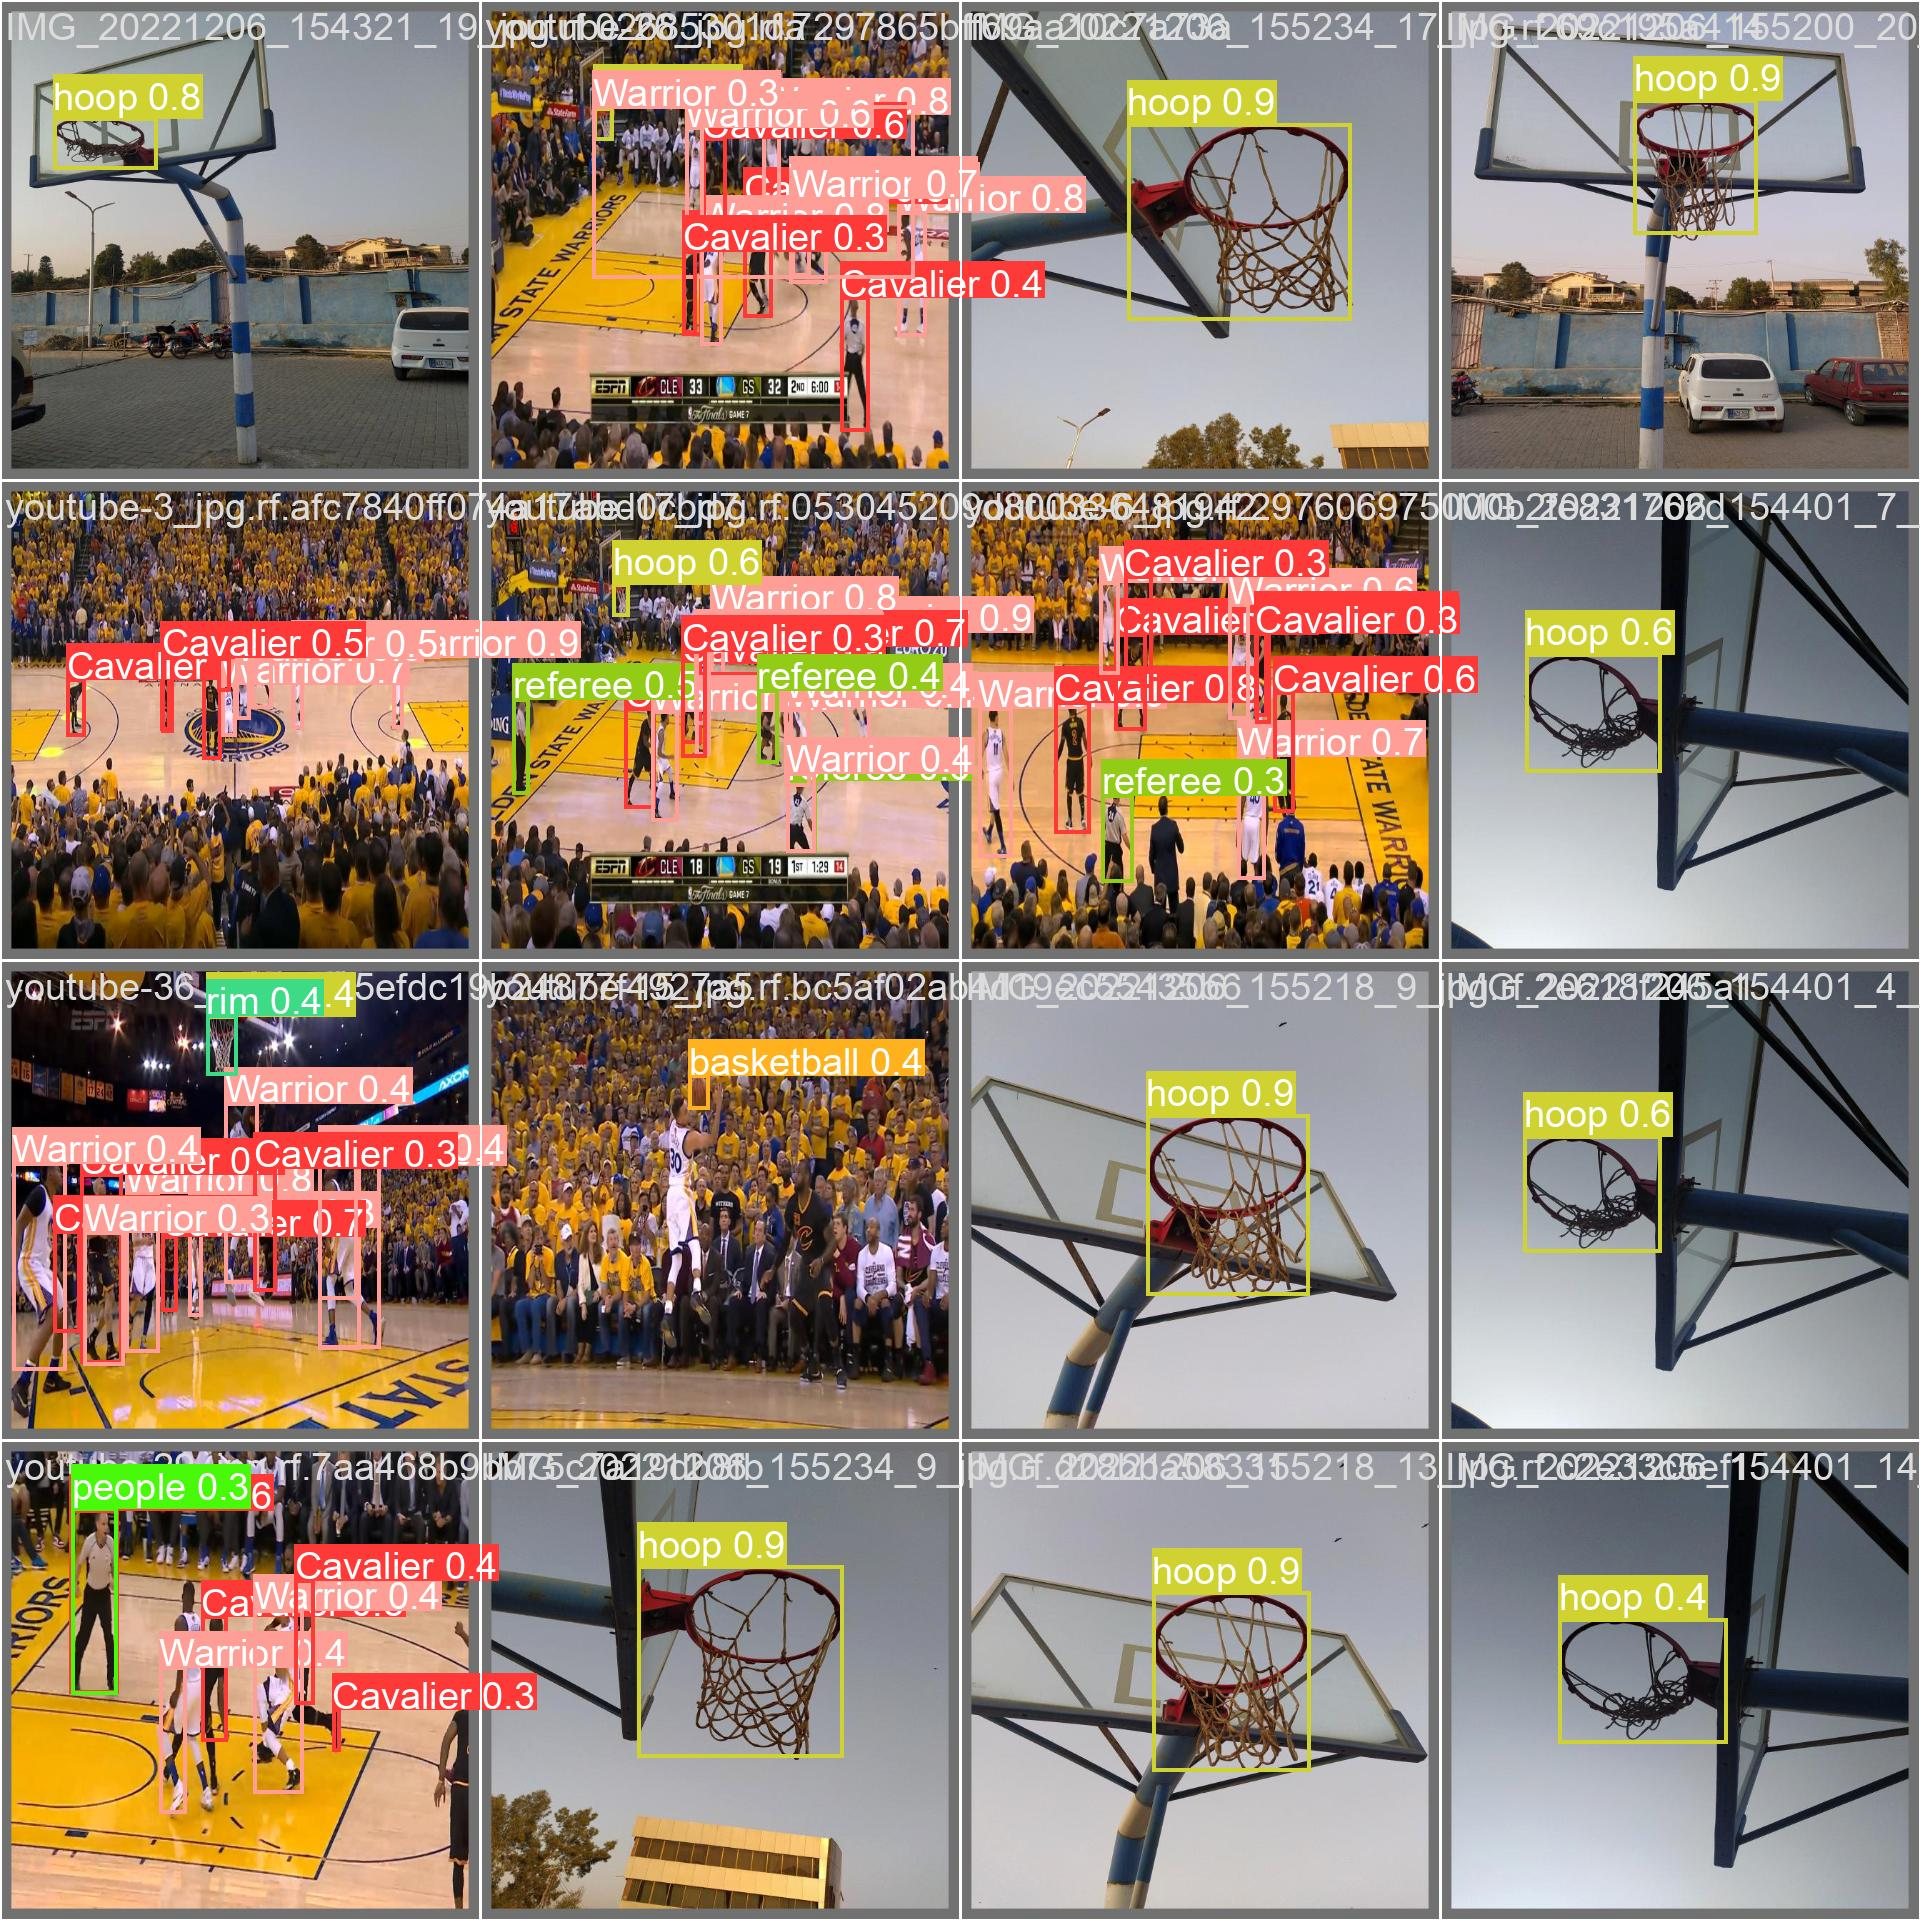

In [14]:
%cd /content
Image(filename=f'/content/runs/detect/train/val_batch0_pred.jpg', width=600)

In [15]:
#Validate Custom Model

%cd /content
#adjust the model path to ensure it's in the latest train since it seems to be adding train folders
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.180 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25844392 parameters, 0 gradients
val: Scanning /content/Warriors-vs-Cavs-2016-4/valid/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100% 21/21 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 122, len(boxes) = 135. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:00<00:00,  2.11it/s]
                   all         21        135      0.651      0.376      0.375      0.236
              Cavalier         21         41      0.412       0.39      0.368      0.208
               Warrior         21         56      0.453      0.429      0.378      0.217
                  ball         21     

In [16]:
!pip install yt_dlp


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 37.6 MB/s eta 0:00:00


In [17]:
#load in data to be inferenced on
import yt_dlp

# List of YouTube video URLs you want to download
video_urls = [
    'https://www.youtube.com/watch?v=-xbrv7pWTRc&t=5s'
    #,'https://youtu.be/X-N9MEWYN8w'
]

# Replace with your desired output directory
output_path = '/content/Youtube_video/'

# Options for yt_dlp (YouTube Downloader)
ydl_opts = {
    'format': 'best',  # Select the best available format
    'outtmpl': output_path + '%(title)s.%(ext)s',  # Output file template
    'quiet': True,  # Suppress output messages
}

# Lists to store successful and failed download URLs
failed_downloads = []
successful_downloads = []

# Initialize YouTube Downloader with the provided options
with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    for url in video_urls:
        try:
            ydl.download([url])  # Download the video
            print("Downloaded:", url)
            successful_downloads.append(url)
        except Exception as e:
            print(f"Failed to download {url}: {e}")
            failed_downloads.append(url)

# Print results
print("\n" * 4)
print("Failed downloads:", failed_downloads)
print("Successful downloads:", successful_downloads)


Downloaded: https://www.youtube.com/watch?v=-xbrv7pWTRc&t=5s





Failed downloads: []
Successful downloads: ['https://www.youtube.com/watch?v=-xbrv7pWTRc&t=5s']


In [18]:
#inference with Custom Model
%cd /content
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.180 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25844392 parameters, 0 gradients

image 1/3 /content/Warriors-vs-Cavs-2016-4/test/images/4VM5IQG8Z810_jpg.rf.829aac626e156204e95b1a405640e77c.jpg: 640x640 1 basketball, 40.7ms
image 2/3 /content/Warriors-vs-Cavs-2016-4/test/images/youtube-25_jpg.rf.01ae0194c711fee26ba4861f4df2e83c.jpg: 640x640 1 Cavalier, 1 Warrior, 1 basketball, 37.1ms
image 3/3 /content/Warriors-vs-Cavs-2016-4/test/images/youtube-34_jpg.rf.06fc3c3e1cb7c80ac8035e4fa6599ef4.jpg: 640x640 4 Cavaliers, 11 Warriors, 3 referees, 37.2ms
Speed: 5.4ms preprocess, 38.3ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [29]:
%cd /content
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source='/content/Youtube_video' save=True

/content
Ultralytics YOLOv8.0.180 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients

video 1/1 (1/3128) /content/Youtube_video/Stephen Curry NO-LOOK THREES 🤯.mp4: 384x640 1 basketball, 1 hoop, 1 referee, 103.9ms
video 1/1 (2/3128) /content/Youtube_video/Stephen Curry NO-LOOK THREES 🤯.mp4: 384x640 1 basketball, 1 hoop, 1 referee, 25.8ms
video 1/1 (3/3128) /content/Youtube_video/Stephen Curry NO-LOOK THREES 🤯.mp4: 384x640 1 Cavalier, 1 basketball, 1 hoop, 1 referee, 25.8ms
video 1/1 (4/3128) /content/Youtube_video/Stephen Curry NO-LOOK THREES 🤯.mp4: 384x640 1 Cavalier, 1 basketball, 1 hoop, 1 referee, 25.8ms
video 1/1 (5/3128) /content/Youtube_video/Stephen Curry NO-LOOK THREES 🤯.mp4: 384x640 1 Cavalier, 1 basketball, 1 hoop, 1 referee, 25.8ms
video 1/1 (6/3128) /content/Youtube_video/Stephen Curry NO-LOOK THREES 🤯.mp4: 384x640 1 Cavalier, 1 hoop, 1 referee, 25.8ms
video 1/1 (7/3128) /content/Youtube_video/S

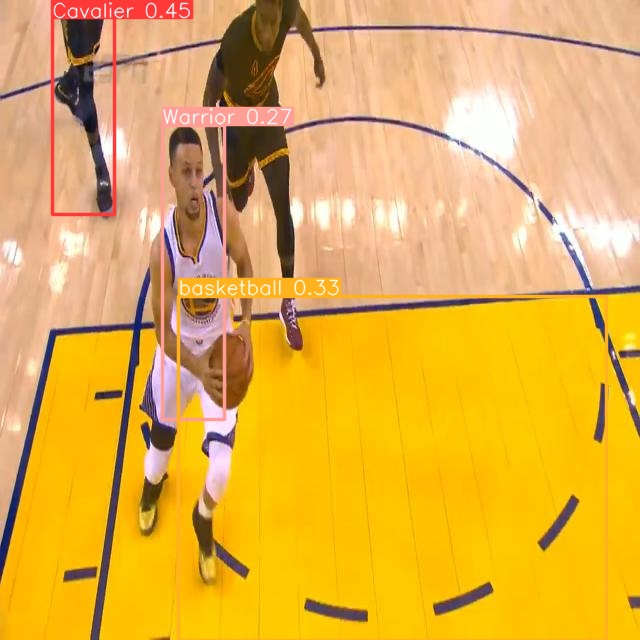

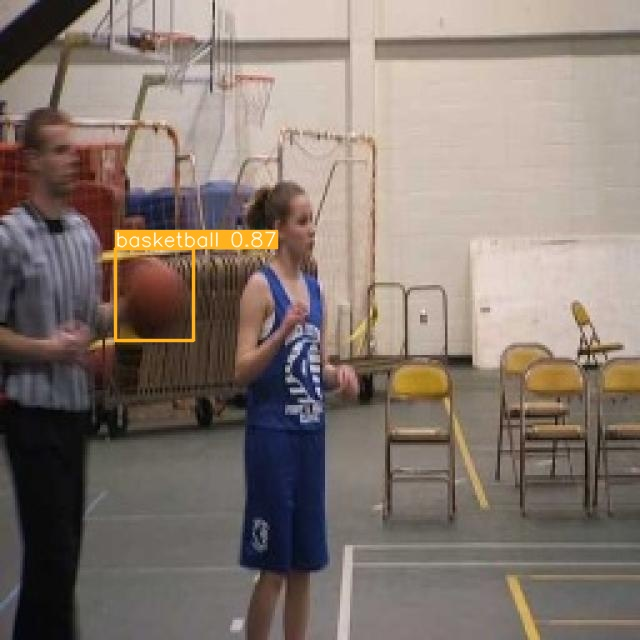

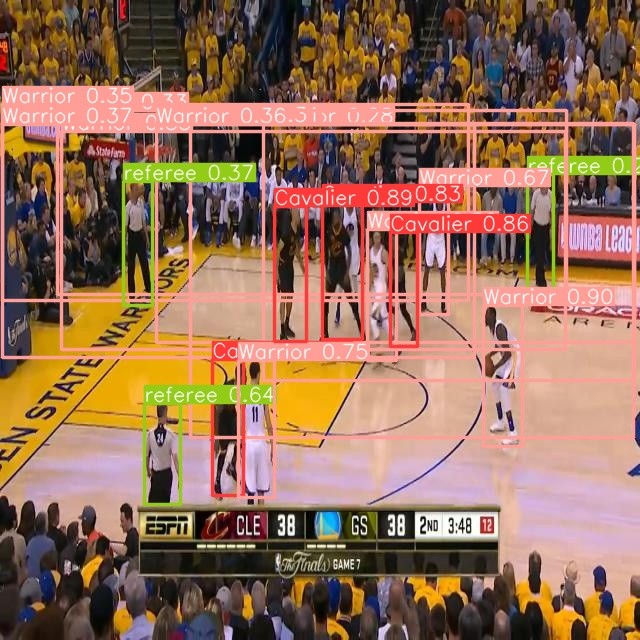

In [31]:
#Visualize some results
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [21]:
!apt-get -qq install ffmpeg


In [32]:
!ffmpeg -i "/content/runs/detect/predict3/Stephen Curry NO-LOOK THREES 🤯.avi" "/content/runs/detect/predict3/Stephen Curry NO-LOOK THREES 🤯.mp4"


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [36]:
#extract an image once every 500 frames to be able to display
!mkdir /content/runs/detect/predict3/frames
!ffmpeg -i "/content/runs/detect/predict3/Stephen Curry NO-LOOK THREES 🤯.mp4" -vf "select=not(mod(n\,1000))" -vsync vfr /content/runs/detect/predict3/frames/%04d.png


mkdir: cannot create directory ‘/content/runs/detect/predict3/frames’: File exists
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheor

In [34]:
!pip install matplotlib

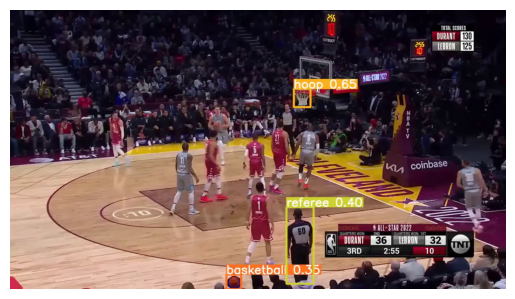

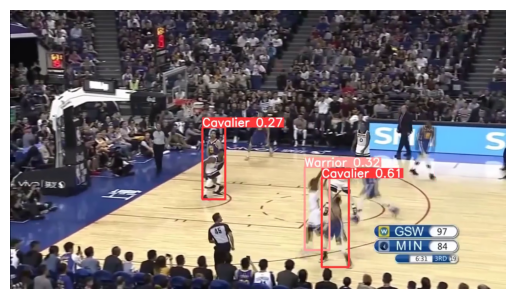

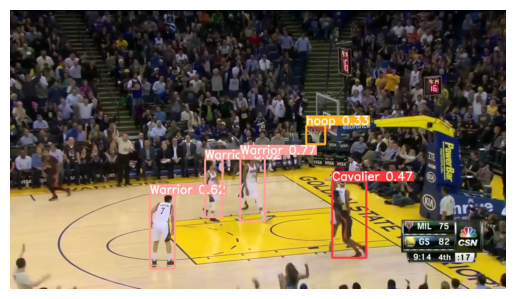

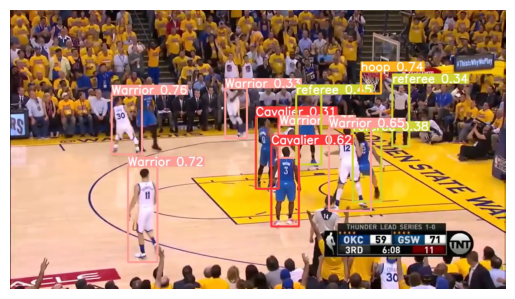

In [37]:
import matplotlib.pyplot as plt
import os

# Get all extracted frames
frames_path = "/content/runs/detect/predict3/frames/"
frames = [os.path.join(frames_path, f) for f in os.listdir(frames_path) if f.endswith('.png')]

# Display each frame
for frame in frames:
    img = plt.imread(frame)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()


In [23]:
from IPython.display import Video

video_path = "/content/runs/detect/predict2/Stephen Curry NO-LOOK THREES 🤯.mp4"
Video(video_path)


In [ ]:
from IPython.display import display, HTML

def play_video(video_path):
    video_html = f"""
    <video width="600" controls>
      <source src="{video_path}" type="video/avi">
    </video>
    """
    display(HTML(video_html))

# Assuming your video path is '/content/runs/detect/predict/video_name.avi'
video_path = "/content/runs/detect/predict2/Stephen Curry NO-LOOK THREES 🤯.mp4"
play_video(video_path)
